# 4.8 Model information
In this notebook information is extracted from the model and building process for the manuscript and supplementary data.
<br>1.1 Model version overview
<br>1.2 Reaction overview

2.1 Subsystem of MG & added reactions (notebook 3.1)
<br>2.2 Visualisation of subsystems
<br>2.3 Origin of added reactions

3.1 Growth rate on biolog media
<br>3.2 Growth rate at other conditions
<br>3.3 Growth rate on carbon sources (Supplementary data - S4)

In [1]:
import cobra
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 1.1 Model version overview

In [2]:
# Load EcN model
EcN_ID = 'CP022686.1'
EcN_model_MG = cobra.io.load_json_model('../data/models/%s_MG.json'%EcN_ID)
EcN_model_0 = cobra.io.load_json_model('../data/models/%s_draft.json'%EcN_ID)
EcN_model_1 = cobra.io.load_json_model('../data/models/%s_cur_4.1.json'%EcN_ID)
EcN_model_2 = cobra.io.load_json_model('../data/models/%s_cur_4.2.json'%EcN_ID)
EcN_model_3 = cobra.io.load_json_model('../data/models/%s_cur_4.3.json'%EcN_ID)
EcN_model_4 = cobra.io.load_json_model('../data/models/%s_cur_4.4.json'%EcN_ID)
EcN_model_5 = cobra.io.load_json_model('../data/models/%s_cur_4.5.json'%EcN_ID)
EcN_model_6 = cobra.io.load_json_model('../data/models/%s_cur_4.6.json'%EcN_ID)
EcN_model_7 = cobra.io.load_json_model('../data/models/%s_cur_4.7.json'%EcN_ID)

In [3]:
model_overview = pd.DataFrame(columns=['id', 'version', 'genes', 'reactions', 'metabolites'])
model_overview.set_index('id', inplace = True)

counter = -1

# Gather the general information on the draft models
for model in [EcN_model_MG, EcN_model_0, EcN_model_1, EcN_model_2,EcN_model_3, EcN_model_4, EcN_model_5, EcN_model_6, EcN_model_7]:
    model_overview.loc[model, 'version'] = counter
    model_overview.loc[model, 'genes'] = len(model.genes)
    model_overview.loc[model, 'reactions'] = len(model.reactions)
    model_overview.loc[model, 'metabolites'] = len(model.metabolites)
    counter += 1

model_overview

,version,genes,reactions,metabolites
id,,,,
CP022686.1,-1,1389,2607,1877
CP022686.1,0,1478,2867,2069
CP022686.1,1,1478,2806,2069
CP022686.1,2,1479,2806,2069
CP022686.1,3,1479,2807,2069
CP022686.1,4,1479,2809,2069
CP022686.1,5,1480,2808,2069
CP022686.1,6,1508,2944,2187
CP022686.1,7,1504,2944,2135


In [4]:
model_overview['gene_diff'] = model_overview.genes.diff()
model_overview['reaction_diff'] = model_overview.reactions.diff()
model_overview['metabolite_diff'] = model_overview.metabolites.diff()
model_overview

,version,genes,reactions,metabolites,gene_diff,reaction_diff,metabolite_diff
id,,,,,,,
CP022686.1,-1,1389,2607,1877,NaN,NaN,NaN
CP022686.1,0,1478,2867,2069,89,260,192
CP022686.1,1,1478,2806,2069,0,-61,0
CP022686.1,2,1479,2806,2069,1,0,0
CP022686.1,3,1479,2807,2069,0,1,0
CP022686.1,4,1479,2809,2069,0,2,0
CP022686.1,5,1480,2808,2069,1,-1,0
CP022686.1,6,1508,2944,2187,28,136,118
CP022686.1,7,1504,2944,2135,-4,0,-52


In [5]:
# Load the reaction origin dataframe
rxn_origin = pd.read_csv('../tables/rxn_origin.csv', usecols=['reaction', 'origin', 'added', 'notebook', 'notes'])
rxn_origin.set_index('reaction', inplace=True)

# Create a dataframe to check that the rxn_origin_df overview is correct
check_overview = pd.DataFrame(columns=['version', 'reactions added', 'reactions removed'])
check_overview.set_index('version', inplace = True)

removed_df = rxn_origin[rxn_origin['added'] == 'removed'] # find all the genes that were removed

# Gather the general information on the draft models
for nr in range(1,8):
    version_df = rxn_origin[rxn_origin['notebook'] == float('4.%s'%nr)] # only get the current notebook
    added = len(version_df[version_df['added'] == 'manual']) # find all added reactions
    removed = len(removed_df[removed_df['notes'].str.contains('4.%s'%nr)])
    
    check_overview.loc[nr, 'reactions added'] = added
    check_overview.loc[nr, 'reactions removed'] = removed
    
check_overview

,reactions added,reactions removed
version,,
1,0,61
2,2,2
3,1,0
4,2,0
5,0,1
6,179,0
7,0,0


## 1.2 Reaction overview

In [6]:
# Load EcN model
model=cobra.io.load_json_model('../data/models/%s_cur_4.7.json'%EcN_ID)

In [7]:
# Flux analysis
fva_result = cobra.flux_analysis.flux_variability_analysis(model) 
essen_rxn = cobra.flux_analysis.find_essential_reactions(model)
essen_rxn_list = [rxn.id for rxn in list(essen_rxn)]

In [8]:
# Store information in dataframe
df_reactions = pd.DataFrame(columns=['ID', 'Name', 'Reaction Formula', 'Gene Rules', 'Subsystem', 
                            'Essentiality', 'LB', 'UB', 'FVA_min', 'FVA_max'])
df_reactions.set_index('ID', inplace=True)
for rxn in model.reactions:
    bigg_id = rxn.id
    df_reactions.loc[bigg_id, 'Name'] = rxn.name
    df_reactions.loc[bigg_id, 'Reaction Formula'] = rxn.reaction
    df_reactions.loc[bigg_id, 'Subsystem'] = rxn.subsystem
    df_reactions.loc[bigg_id, 'Gene Rules'] = rxn.gene_reaction_rule
    df_reactions.loc[bigg_id, 'LB'] = rxn.lower_bound
    df_reactions.loc[bigg_id, 'UB'] = rxn.upper_bound
    df_reactions.loc[bigg_id, 'FVA_min'] = fva_result.loc[bigg_id, 'minimum']
    df_reactions.loc[bigg_id, 'FVA_max'] = fva_result.loc[bigg_id, 'maximum']
    if bigg_id in essen_rxn_list:
        df_reactions.loc[bigg_id, 'Essentiality'] = 'Essential'
    else:
        df_reactions.loc[bigg_id, 'Essentiality'] = 'Not essential'

df_reactions.head()

,Name,Reaction Formula,Gene Rules,Subsystem,Essentiality,LB,UB,FVA_min,FVA_max
ID,,,,,,,,,
ALATA_D2,D-alanine transaminase,ala__D_c + pydx5p_c --> pyam5p_c + pyr_c,CIW80_06560 or CIW80_22360,Cofactor and Prosthetic Group Biosynthesis,Not essential,0.0,1000.0,0.0,0.0
SHCHD2,Sirohydrochlorin dehydrogenase (NAD),dscl_c + nad_c --> h_c + nadh_c + scl_c,CIW80_11380,Cofactor and Prosthetic Group Biosynthesis,Essential,0.0,1000.0,0.00025,0.00025
CPPPGO,Coproporphyrinogen oxidase (O2 required),cpppg3_c + 2.0 h_c + o2_c --> 2.0 co2_c + 2.0 ...,CIW80_06055,Cofactor and Prosthetic Group Biosynthesis,Not essential,0.0,1000.0,0.00025,0.00025
GTHOr,Glutathione oxidoreductase,gthox_c + h_c + nadph_c <=> 2.0 gthrd_c + nadp_c,CIW80_12105,Cofactor and Prosthetic Group Biosynthesis,Not essential,-1000.0,1000.0,0.0,0.277497
DHORD5,Dihydroorotic acid (menaquinone-8),dhor__S_c + mqn8_c --> mql8_c + orot_c,CIW80_22710,Purine and Pyrimidine Biosynthesis,Not essential,0.0,1000.0,0.0,0.370914


In [9]:
# Save dataframe as .csv
df_reactions.to_csv('../tables/CP022686.1_cur_4.7_reactions_info.csv')

In [10]:
# Divide by subsystem
subsystems = df_reactions['Subsystem'].unique().tolist()

df_reactions['Subsystem'].value_counts()[:15]
# df_reactions['Subsystem'].value_counts(normalize=True)

Transport, Inner Membrane                      363
Transport, Outer Membrane                      352
Extracellular exchange                         339
Glycerophospholipid Metabolism                 246
Cofactor and Prosthetic Group Biosynthesis     224
Alternate Carbon Metabolism                    204
Inorganic Ion Transport and Metabolism         165
Nucleotide Salvage Pathway                     151
Cell Envelope Biosynthesis                     136
Secondary metabolite biosynthesis              109
Lipopolysaccharide Biosynthesis / Recycling     67
Oxidative Phosphorylation                       52
Arginine and Proline Metabolism                 43
Membrane Lipid Metabolism                       43
Murein Recycling                                37
Name: Subsystem, dtype: int64

## 2.1 Subsystem of MG & added reactions (notebook 3.1)

In [11]:
# Load the reaction origin dataframe
rxn_origin = pd.read_csv('../tables/rxn_origin.csv', usecols=['reaction', 'origin', 'added', 'notebook', 'notes'])
rxn_origin

,reaction,origin,added,notebook,notes
0,ALATA_D2,iML1515,automatic,3.1,none
1,SHCHD2,iML1515,automatic,3.1,none
2,CPPPGO,iML1515,automatic,3.1,none
3,GTHOr,iML1515,automatic,3.1,none
4,DHORD5,iML1515,automatic,3.1,none
...,...,...,...,...,...
3005,EX_clbtn_e,New Reaction,manual,4.6,none
3006,MTRK,iAF1260,manual,4.6,Added based on Sun et al. (2005) in notebook 4.6
3007,MTRI,iAF1260,manual,4.6,Added based on Sun et al. (2005) in notebook 4.6
3008,ACGAL6PDA,New Reaction,manual,4.2,Reaction added in 4.2. Replaces one step of th...


In [12]:
# Merge reaction origin dataframe with df_reactions dataframe
rxn_df = pd.merge(rxn_origin, df_reactions, left_on = 'reaction', right_index =True)
rxn_df = rxn_df[rxn_df['added'] != 'removed'] # Do not take into account reactions that were removed in later notebooks
# rxn_df = rxn_df[rxn_df['added'] != 'manual'] # Do not take into account reactions that were added in later notebooks
# rxn_df.head()

The reactions removed in later stages are not considered in this analysis

In [13]:
# Group unassigned/empty subsystems in "other"
rxn_df.loc[rxn_df['Subsystem'] == '', 'Subsystem'] = 'Other'
rxn_df.loc[rxn_df['Subsystem'] == 'Unassigned', 'Subsystem'] = 'Other'

In [14]:
### Create a dataframe which shows in which stage of construction (MG, ref or manual) the reactions were added

subsystem_df = pd.DataFrame(columns=['MG', 'ref', 'manual', 'total'])

# Create a "total" dataset (To make this graph with seaborn)
subsystem_df['total'] = rxn_df['Subsystem'].value_counts()

# Subsystems of reactions added to iML1515 reduced model from reference strains
added_rxn = rxn_df[rxn_df['origin'] != 'iML1515']
ref_rxn = added_rxn[added_rxn['added'] != 'manual']
subsystem_df['ref'] = ref_rxn['Subsystem'].value_counts()

# Subsystems of reactions manually added
manual_rxn = added_rxn[added_rxn['added'] == 'manual']
subsystem_df['manual'] = manual_rxn['Subsystem'].value_counts()

# Subsystems of reactions part of iML1515 reduced model
MG_rxn = rxn_df[rxn_df['origin'] == 'iML1515']
subsystem_df['MG'] = MG_rxn['Subsystem'].value_counts()

# subsystem_df = subsystem_df[subsystem_df['total'] > 15 ]
subsystem_df.fillna(0, inplace=True)

subsystem_df

,MG,ref,manual,total
"Transport, Inner Membrane",336.0,19.0,1.0,356
"Transport, Outer Membrane",319.0,32.0,1.0,352
Extracellular exchange,329.0,0.0,10.0,339
Glycerophospholipid Metabolism,246.0,0.0,0.0,246
Cofactor and Prosthetic Group Biosynthesis,212.0,12.0,0.0,224
Alternate Carbon Metabolism,187.0,15.0,1.0,203
Inorganic Ion Transport and Metabolism,102.0,4.0,59.0,165
Nucleotide Salvage Pathway,150.0,1.0,0.0,151
Cell Envelope Biosynthesis,135.0,1.0,0.0,136
Secondary metabolite biosynthesis,0.0,0.0,109.0,109


In [15]:
# Count number of transport reactions added
# Also include the transport reactions in "Other"
transport_rxn = subsystem_df[subsystem_df.index.str.contains('Transport')]
transport_rxn
transport_rxn.sum()

MG        757.0
ref        56.0
manual     61.0
total     874.0
dtype: float64

In [16]:
# Count the total number of reactions added in each stage
subsystem_df.sum()

MG        2565.0
ref        188.0
manual     183.0
total     2936.0
dtype: float64

# 2.2 Visualisation of subsystems
Code for plotting was based on: https://randyzwitch.com/creating-stacked-bar-chart-seaborn/

In [17]:
# Combine MG and ref for representation in the figure
subsystem_df['MG_ref'] = subsystem_df['MG'] + subsystem_df['ref']

# Combine all amino acid related reactions
subsystem_df.loc['Amino Acid Metabolism'] = (subsystem_df.loc['Arginine and Proline Metabolism'] +
                                             subsystem_df.loc['Tyrosine, Tryptophan, and Phenylalanine Metabolism'] +
                                             subsystem_df.loc['Threonine and Lysine Metabolism'] +
                                             subsystem_df.loc['Glycine and Serine Metabolism'] +
                                             subsystem_df.loc['Valine, Leucine, and Isoleucine Metabolism'] +
                                             subsystem_df.loc['Methionine Metabolism'] +
                                             subsystem_df.loc['Cysteine Metabolism'] +
                                             subsystem_df.loc['Histidine Metabolism'] +
                                             subsystem_df.loc['Alanine and Aspartate Metabolism'] +
                                             subsystem_df.loc['Glutamate Metabolism'] +
                                             subsystem_df.loc['Lysine Metabolism'] +
                                             subsystem_df.loc['Tryptophan metabolism'] +
                                             subsystem_df.loc['Phenylalanine Metabolism'] +
                                             subsystem_df.loc['Tyrosine metabolism'])

subsystem_df.drop(['Arginine and Proline Metabolism',
                  'Tyrosine, Tryptophan, and Phenylalanine Metabolism',
                  'Threonine and Lysine Metabolism',
                  'Glycine and Serine Metabolism',
                  'Valine, Leucine, and Isoleucine Metabolism',
                  'Methionine Metabolism',
                  'Cysteine Metabolism',
                  'Histidine Metabolism',
                  'Alanine and Aspartate Metabolism',
                  'Glutamate Metabolism',
                  'Lysine Metabolism',
                  'Tryptophan metabolism',
                  'Phenylalanine Metabolism',
                  'Tyrosine metabolism'], inplace=True)

# Add "Transport" and "Exchange" to "Other"
subsystem_df.loc['Other'] = subsystem_df.loc['Exchange'] + subsystem_df.loc['Transport'] + subsystem_df.loc['Other']
subsystem_df.drop(['Exchange', 'Transport'], inplace=True)

# Place the "Other" catagory as last for the graph
other_s = subsystem_df.loc['Other']
subsystem_df = subsystem_df.drop(index ='Other')
subsystem_df = subsystem_df.sort_values('total', ascending=False)
subsystem_df = subsystem_df.append(other_s, ignore_index=False)

subsystem_df

,MG,ref,manual,total,MG_ref
"Transport, Inner Membrane",336.0,19.0,1.0,356.0,355.0
"Transport, Outer Membrane",319.0,32.0,1.0,352.0,351.0
Extracellular exchange,329.0,0.0,10.0,339.0,329.0
Glycerophospholipid Metabolism,246.0,0.0,0.0,246.0,246.0
Cofactor and Prosthetic Group Biosynthesis,212.0,12.0,0.0,224.0,224.0
Alternate Carbon Metabolism,187.0,15.0,1.0,203.0,202.0
Amino Acid Metabolism,170.0,10.0,2.0,182.0,180.0
Inorganic Ion Transport and Metabolism,102.0,4.0,59.0,165.0,106.0
Nucleotide Salvage Pathway,150.0,1.0,0.0,151.0,151.0
Cell Envelope Biosynthesis,135.0,1.0,0.0,136.0,136.0


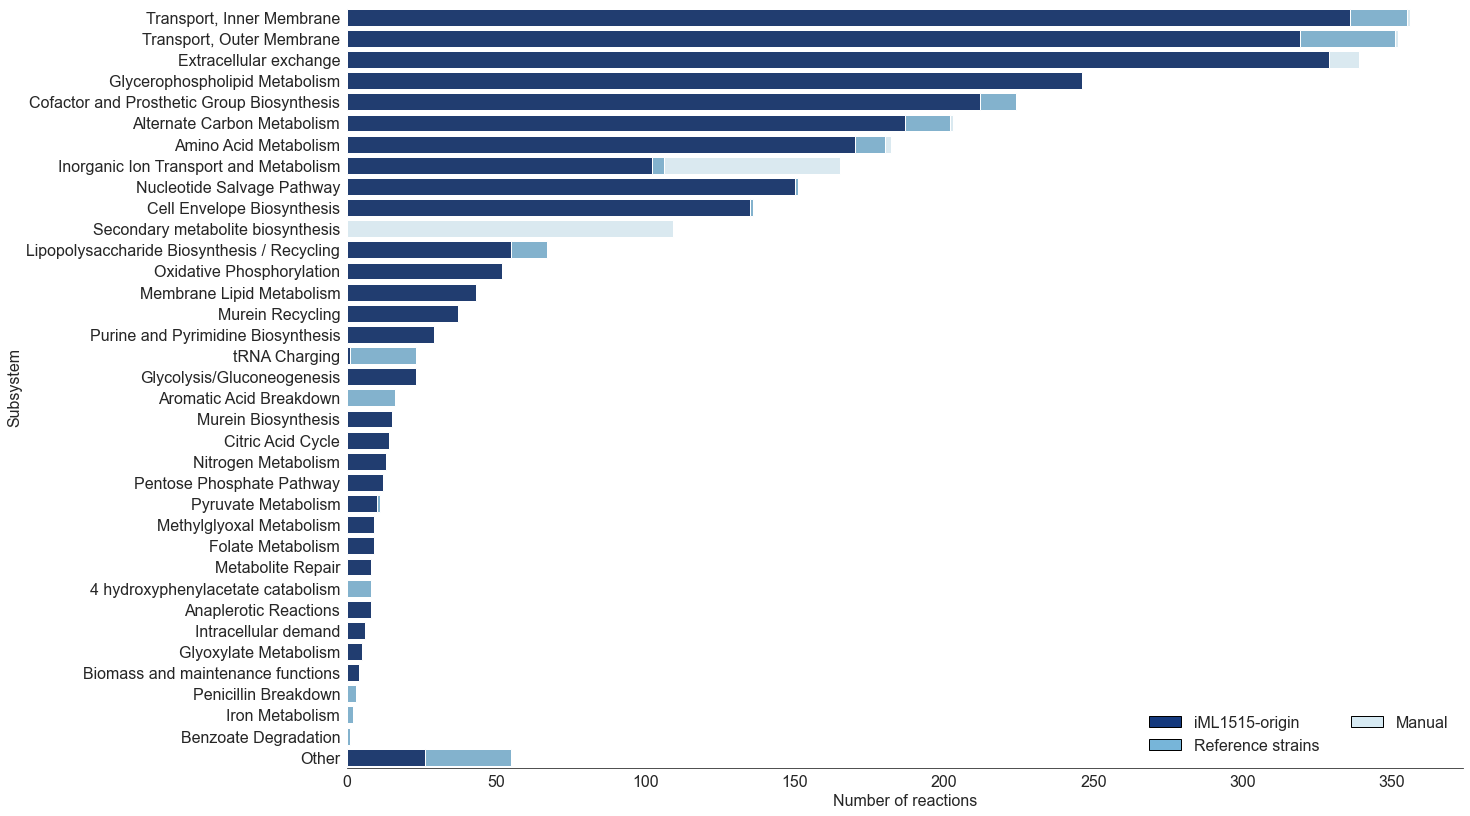

In [18]:
%matplotlib inline

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 14)})

#Plot 1 - background - "total" (top) series
sns_plot = sns.barplot(x = subsystem_df.total, y = subsystem_df.index, color = "#d7eaf3")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = subsystem_df.MG_ref, y = subsystem_df.index, color = "#77b5d9")

#Plot 3 - overlay - "bottom" series
top_plot = sns.barplot(x = subsystem_df.MG, y = subsystem_df.index, color = "#14397d")


topbar = plt.Rectangle((0,0),1,1,fc="#d7eaf3", edgecolor = 'black')
bottombar = plt.Rectangle((0,0),1,1,fc='#77b5d9',  edgecolor = 'black')
midbar = plt.Rectangle((0,0),1,1,fc='#14397d',  edgecolor = 'black')
legend = plt.legend([midbar, bottombar, topbar], ['iML1515-origin', 'Reference strains', 'Manual'], loc=4, ncol = 2, prop={'size':16})
legend.draw_frame(False)

#Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Subsystem")
bottom_plot.set_xlabel("Number of reactions")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    
# Save figure
plt.savefig("../figures/3.3_subsystem_plot.eps", bbox_inches='tight') #bbox_inches to include complete y-axis labels

# 2.3 Origin of added reactions

In [19]:
# From which models were the tRNA charging reactions added?
rxn_df[rxn_df['Subsystem'] == 'tRNA Charging']

,reaction,origin,added,notebook,notes,Name,Reaction Formula,Gene Rules,Subsystem,Essentiality,LB,UB,FVA_min,FVA_max
47,GLUTRS,iML1515,automatic,3.1,none,Glutamyl-tRNA synthetase,atp_c + glu__L_c + trnaglu_c --> amp_c + glutr...,CIW80_05875,tRNA Charging,Essential,0.0,1000.0,0.004001,0.004001
2616,TYRTRS,iLF82_1304,automatic,3.1,none,Tyrosyl-tRNA synthetase,atp_c + trnatyr_c + tyr__L_c --> amp_c + ppi_c...,CIW80_01035,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0
2619,PHETRS,iLF82_1304,automatic,3.1,none,Phenylalanyl-tRNA synthetase,atp_c + phe__L_c + trnaphe_c --> amp_c + phetr...,CIW80_01445 and CIW80_01450,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2620,THRTRS,iLF82_1304,automatic,3.1,none,Threonyl-tRNA synthetase,atp_c + thr__L_c + trnathr_c --> amp_c + ppi_c...,CIW80_01475,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2625,ASPTRS,iLF82_1304,automatic,3.1,none,Aspartyl-tRNA synthetase,asp__L_c + atp_c + trnaasp_c --> amp_c + asptr...,CIW80_02255,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2626,ARGTRS,iLF82_1304,automatic,3.1,none,Arginyl-tRNA synthetase,arg__L_c + atp_c + trnaarg_c --> amp_c + argtr...,CIW80_02600,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0
2632,METTRS,iLF82_1304,automatic,3.1,none,Methionyl-tRNA synthetase,atp_c + met__L_c + trnamet_c --> amp_c + mettr...,CIW80_04360,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2690,HISTRS,iLF82_1304,automatic,3.1,none,Histidyl-tRNA synthetase,atp_c + his__L_c + trnahis_c --> amp_c + histr...,CIW80_06400,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0
2695,ALATRS,iLF82_1304,automatic,3.1,none,Alanyl-tRNA synthetase,ala__L_c + atp_c + trnaala_c --> alatrna_c + a...,CIW80_07155,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2699,LYSTRS,iLF82_1304,automatic,3.1,none,Lysyl-tRNA synthetase,atp_c + lys__L_c + trnalys_c --> amp_c + lystr...,CIW80_08175,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0


In [20]:
# Load strain_info dataframe
strain_info = pd.read_csv('../tables/strain_info.csv')

# Merge the added_rxn dataframe with the strain_info dataframe to get the strain names.
added_rxn = pd.merge(added_rxn, strain_info, left_on = 'origin', right_on='Model Name')

added_distribution = added_rxn['Strain'].value_counts()
print(len(added_distribution))
added_distribution

11


Escherichia coli LF82              144
Escherichia coli W CP002185         33
Escherichia coli UM146               3
Escherichia coli ED1a                2
Escherichia coli B str. REL606       2
Shigella flexneri 2a str. 2457T      1
Shigella flexneri 2002017            1
Escherichia coli SE15                1
Escherichia coli KO11FL              1
Shigella boydii CDC 3083-94          1
Escherichia coli S88                 1
Name: Strain, dtype: int64

## 3.1 Growth rate on biolog media

In [21]:
# Load EcN model
EcN_ID = 'CP022686.1'
EcN_model= cobra.io.load_json_model('../data/models/%s_cur_4.7.json'%EcN_ID)
iML1515 = cobra.io.load_json_model('../data/models/iML1515.json')

In [22]:
# Test normal FBA

for model in [EcN_model, iML1515]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 15

    medium['EX_nh4_e'] = 19 # 19 mM NH4Cl
    medium['EX_pi_e'] = 60 # 48mM Na2HPO4 + 22 mM KH2PO4  
    medium['EX_so4_e'] = 2 # 2 mM MgSO4

    medium['EX_mg2_e'] = 2 # 2 mM MgSO4
    medium['EX_ca2_e'] = 0.1 # 0.1 mM CaCl2SS

    medium['EX_na1_e'] = 105 # 48 mM Na2HPO4 + 9 mM NaCl
    medium['EX_k_e'] = 22 # 22 mM KH2PO4
    medium['EX_cl_e'] = 28 # 9 mM NaCl + 19 mM NH4Cl

    medium['EX_thm_e'] = 0.38 # 0.1 g/L > 0.1/265.355 x 1000 = 0.376854 mM

    model.medium = medium
    
    solution = model.optimize()
    print(model.id, solution.objective_value)

CP022686.1 0.9950285368745586
iML1515 1.328550773766173


In [23]:
pfba_solution = cobra.flux_analysis.pfba(EcN_model)
solution_df = pfba_solution.to_frame()
solution_df.loc['BIOMASS_Ec_iML1515_core_75p37M']

fluxes           0.995029
reduced_costs   -2.000000
Name: BIOMASS_Ec_iML1515_core_75p37M, dtype: float64

In [24]:
pfba_solution_iML = cobra.flux_analysis.pfba(iML1515)
solution_iML_df = pfba_solution_iML.to_frame()
solution_iML_df.loc['BIOMASS_Ec_iML1515_core_75p37M']

fluxes           1.328551
reduced_costs   -2.000000
Name: BIOMASS_Ec_iML1515_core_75p37M, dtype: float64

In [25]:
EcN_model.summary(fva=0.90)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ca2_e,EX_ca2_e,0.005179,[0.004661; 0.005179],0,0.00%
cl_e,EX_cl_e,0.005179,[0.004661; 0.005179],0,0.00%
cobalt2_e,EX_cobalt2_e,2.488E-05,[2.239E-05; 2.473E-05],0,0.00%
cu2_e,EX_cu2_e,0.0007055,[0.0006349; 0.1817],0,0.00%
fe2_e,EX_fe2_e,0.008212,[-8.507; 11.83],0,0.00%
fe3_e,EX_fe3_e,0.007769,[-11.81; 8.521],0,0.00%
glc__D_e,EX_glc__D_e,15,[12.04; 15],6,100.00%
k_e,EX_k_e,0.1942,[0.1748; 0.1942],0,0.00%
mg2_e,EX_mg2_e,0.008632,[0.007769; 0.008632],0,0.00%
mn2_e,EX_mn2_e,0.0006876,[0.0006188; 0.0006876],0,0.00%


## 3.2 Growth rate at other conditions

### Test for conditions of Revelles (Csr) paper
Growth rate was 0.79 +- 0.02

In [26]:
# Test pFBA

for model in [EcN_model]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 15

    medium['EX_nh4_e'] = 19 # 19 mM NH4Cl
    medium['EX_pi_e'] = 60 # 48mM Na2HPO4 + 22 mM KH2PO4  
    medium['EX_so4_e'] = 2 # 2 mM MgSO4

    medium['EX_mg2_e'] = 2 # 2 mM MgSO4
    medium['EX_ca2_e'] = 0.1 # 0.1 mM CaCl2SS

    medium['EX_na1_e'] = 105 # 48 mM Na2HPO4 + 9 mM NaCl
    medium['EX_k_e'] = 22 # 22 mM KH2PO4
    medium['EX_cl_e'] = 28 # 9 mM NaCl + 19 mM NH4Cl

    medium['EX_thm_e'] = 0.38 # 0.1 g/L > 0.1/265.355 x 1000 = 0.376854 mM

    model.medium = medium
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    print(solution_df.loc['BIOMASS_Ec_iML1515_core_75p37M'])

fluxes           0.995029
reduced_costs   -2.000000
Name: BIOMASS_Ec_iML1515_core_75p37M, dtype: float64


### Test for conditions microgravity paper (https://www.mdpi.com/1422-0067/21/8/2666/htm)
Growth rate was 0.44 h−1
M9 minimal media (47.8 mM Na2HPO4∙7H2O, 22 mM KH2PO4, 8.6 mM NaCl, 18.7 mM NH4Cl, 2 mM MgSO4, and 0.1 mM CaCl2) supplemented with 0.4% glucose (w/v)

In [27]:
# Test pFBA

for model in [EcN_model]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 22.2 # 0.4 g/100mL > 4 g/L > 22.2 mM

    medium['EX_nh4_e'] = 18.7 # 18.7 mM NH4Cl
    medium['EX_pi_e'] = 69.8 # 47.8 mM Na2HPO4∙7H2O +  22 mM KH2PO4
    medium['EX_so4_e'] = 2 # 2 mM MgSO4

    medium['EX_mg2_e'] = 2 # 2 mM MgSO4
    medium['EX_ca2_e'] = 0.1 # 0.1 mM CaCl2

    medium['EX_na1_e'] = 104.2 # 47.8 mM Na2HPO4∙7H2O + 8.6 mM NaCl
    medium['EX_k_e'] = 22 # 22 mM KH2PO4
    medium['EX_cl_e'] = 27.5 # 8.6 mM NaCl + 18.7 mM NH4Cl + 0.1 mM CaCl2


    model.medium = medium
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    print(solution_df.loc['BIOMASS_Ec_iML1515_core_75p37M'])

fluxes           1.176954
reduced_costs   -2.000000
Name: BIOMASS_Ec_iML1515_core_75p37M, dtype: float64


### Test for MOPS paper (https://link.springer.com/article/10.1007/s00438-010-0578-8#SecESM1)
Growth rate was ~0.018 h−1 (0.015 when not including the first time point)

MOPS:<br>
1.32 K2HPO4, 9.52 NH4C, 0.523 MgCl2, 0.276 K2SO4, 0.010 FeSO4, 5 x 10-4 CaCl2, 50 NaCl, 40 MOPS, 4 Tricine + mcironutrients: (NH4)6(MO7)24, 3 x 10-6 mM; H3BO3, 4 x 10-4 mM; CoCl2, 3 x 10-6 mM; CuSO4, 10-5 mM; MnCl2, 8 x10-5 mM; ZnSO4, 10-5 mM
https://jb.asm.org/content/jb/119/3/736.full.pdf

In [28]:
# Test pFBA

for model in [EcN_model]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 11.1 # 0.2 g/100mL > 2 g/L > 11.1 mM

    medium['EX_nh4_e'] = 9.52 # NH4C
    medium['EX_pi_e'] = 1.32 # K2HPO4
    medium['EX_so4_e'] = 0.286 # 0.276 K2SO4, 0.010 FeSO4

    medium['EX_mg2_e'] = 0.523 # 0.523 mM MgCl2
    medium['EX_ca2_e'] = 5e-4 # 5 x 10-4 CaCl2

    medium['EX_na1_e'] = 50 # 50 NaCl
    medium['EX_k_e'] = 3.192 # 1.32 K2HPO4, 0.276 K2SO4
    medium['EX_cl_e'] = 50.5235 # 0.523 MgCl2 + 5 x 10-4 CaCl2, 50 NaCl

    medium['EX_mobd_e'] = 24 * 3e-6
    medium['EX_cobalt2_e'] = 3e-6 #
    medium['EX_cu2_e'] = 1e-5 #
    medium['EX_mn2_e'] = 8e-5 #
    medium['EX_zn2_e'] = 1e-5 #

    model.medium = medium
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    print(solution_df.loc['BIOMASS_Ec_iML1515_core_75p37M'])

fluxes           0.014104
reduced_costs   -2.000000
Name: BIOMASS_Ec_iML1515_core_75p37M, dtype: float64


# 3.3 Growth rate on carbon sources (Supplementary data - S4)

In [29]:
# Glucose, Arabinose, Fucose, Galactose, Gluconate, Mannose, N-acetylgalactosamine, N-acetylneuraminate > https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4510460/#!po=30.0000
# Galacturonate, Xylose, Acetate, Fructose, Malate, Maltose, Ribose, Glucuronic, Lactose, N-acetylglucosamine > Pierre Millard - Role of the Csr system in carbon nutrition and in the control of central metabolism in Escherichia coli K-12 MG1655 and Nissle 1917
# (Dextrose), Rhamnose, Sorbitol > https://www.tandfonline.com/doi/full/10.3109/08910600903444267
# EcN is a typical E. coli strain, with the exception that it is capable of metabolizing arginine. This property is seen in just about 7% of all E. coli isolates. > https://www.tandfonline.com/doi/full/10.3109/08910600903444267

carbon_sources = ['EX_arab__L_e',
                 'EX_fuc__L_e',
                 'EX_gal_e',
                 'EX_glcn_e',
                 'EX_man_e',
                 'EX_acgal_e',
                 'EX_acnam_e',
                 'EX_galur_e',
                 'EX_xyl__D_e',
                 'EX_ac_e',
                 'EX_fru_e',
                 'EX_mal__D_e',
                 'EX_mal__L_e',
                 'EX_malt_e',
                 'EX_rib__D_e',
                 'EX_glcur_e',
                 'EX_lcts_e',
                 'EX_acgam_e',
                 'EX_rmn_e',
                 'EX_sbt__D_e',
                 'EX_arg__L_e']

print('Number of carbon sources:', len(carbon_sources))

Number of carbon sources: 21


In [30]:
# Create a dataframe with the carbon sources and EcN growth

# Load EcN model
EcN_model=cobra.io.load_json_model('../data/models/%s_cur_4.7.json'%EcN_ID)

# Create dataframe to store the information
carbon_df = pd.DataFrame(columns=['Carbon source', 'Growth rate'], index=carbon_sources)
carbon_df.index.name = 'Exchange reaction'
carbon_df

# set glucose to zero, to ensure you only have one carbon source
EcN_model.reactions.EX_glc__D_e.lower_bound=0

for c_source in carbon_sources:
    with EcN_model:

        # change to other carbon source
        EcN_model.reactions.get_by_id(c_source).lower_bound=-20
        
        #determine growth on carbon source
        solution = EcN_model.slim_optimize()
        
        # store the solution
        carbon_df.loc[c_source, 'Growth rate'] = solution
        carbon_df.loc[c_source, 'Carbon source'] = EcN_model.reactions.get_by_id(c_source).name
        
carbon_df

,Carbon source,Growth rate
Exchange reaction,,
EX_arab__L_e,L-Arabinose exchange,0.994953
EX_fuc__L_e,L-Fucose exchange,0.798295
EX_gal_e,D-Galactose exchange,1.079171
EX_glcn_e,D-Gluconate exchange,1.048989
EX_man_e,D-Mannose exchange,1.12128
EX_acgal_e,N-Acetyl-D-galactosamine exchange,1.154926
EX_acnam_e,N-Acetylneuraminate exchange,1.290743
EX_galur_e,D-Galacturonate exchange,0.966088
EX_xyl__D_e,D-Xylose exchange,0.868626


In [31]:
# Save as a table
carbon_df.to_csv('../tables/carbon_df.csv')